#**Link to medium:** https://allysonf.medium.com/exploratory-data-analysis-on-palmer-archipelago-antarctica-penguin-data-41ff3e6efeda

# Exploratory Data Analysis on Palmer Archipelago (Antarctica) Penguin Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the data:

In [ ]:
df = pd.read_csv("penguins_size.csv")

Let's give our data a first look!

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.head()

## Data Wrangling:

Deal with **missing values**:

In [ ]:
df.isnull().sum() #out of 7 columns, 5 columns have missing data 

Use sklearn.impute.SimpleImputer to replace missing data:

In [ ]:
from sklearn.impute import SimpleImputer 
replace_data = SimpleImputer(missing_values=np.nan,strategy = "most_frequent") 
# "most frequent" strategy replaces missing data by using the most frequent value along each column
df.iloc[:,:] = replace_data.fit_transform(df)
#fit replace data to all rows in df, and return a transformed version of all rows in df

Check to see if any missing data remains...



In [ ]:
df.isnull().sum() #no missing data, good!

## Visual Data Analysis:

###Culmen Depth and Culmen Length for Species:

Now, Let's investigate our first inquiry: 
For every species of penguin, is there any correlation between its culmen depth and culmen length? 

First, let's see how many penguins we have for each species!

In [ ]:
print(df.species.unique()) 
print(df.value_counts(subset = df.species))

Notice that the sample size varies for each species. In order to **avoid any over or under sampling problem**, I adopted **simple random sampling** for each species to balance the data set. 


In [ ]:
#simple random sampling
import random
random.seed(234)
df_adelie = df[df.species == "Adelie"].sample(n = 50)
df_chinstrap = df[df.species == "Chinstrap"].sample(n = 50)
df_gentoo = df[df.species == "Gentoo"].sample(n = 50)

Draw a **scatter plot** for each species:

In [ ]:
plt.figure(figsize=(8,8))
#scatter plot
plt.scatter(df_adelie.culmen_depth_mm, df_adelie.culmen_length_mm, marker ='o', color = 'r', alpha = 0.5, label = "Adelie")
plt.scatter(df_chinstrap.culmen_depth_mm, df_chinstrap.culmen_length_mm, marker ='o', color = 'g', alpha = 0.5, label = "Chinstrap")
plt.scatter(df_gentoo.culmen_depth_mm, df_gentoo.culmen_length_mm, marker ='o', color = 'y', alpha = 0.5, label = "Gentoo")
#add axis and title
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Culmen Length (mm)')
plt.title('Culmen Depth v.s Culmen Length for Three Species of Penguins')
#fit a best-fitting line
m, b = np.polyfit(df_adelie.culmen_depth_mm, df_adelie.culmen_length_mm, 1)
plt.plot(df_adelie.culmen_depth_mm, m*df_adelie.culmen_depth_mm + b)
m, b = np.polyfit(df_chinstrap.culmen_depth_mm, df_chinstrap.culmen_length_mm, 1)
plt.plot(df_chinstrap.culmen_depth_mm, m*df_chinstrap.culmen_depth_mm + b)
m, b = np.polyfit(df_gentoo.culmen_depth_mm, df_gentoo.culmen_length_mm, 1)
plt.plot(df_gentoo.culmen_depth_mm, m*df_gentoo.culmen_depth_mm + b)
#add legend and grid
plt.legend()
plt.grid()
plt.show()

Calculate the correlation between culmen depth and culmen length for three species:



In [ ]:
adelie_corr = round(df_adelie.culmen_depth_mm.corr(df_adelie.culmen_length_mm),3)
chinstrap_corr = round(df_chinstrap.culmen_depth_mm.corr(df_chinstrap.culmen_length_mm),3)
gentoo_corr = round(df_gentoo.culmen_depth_mm.corr(df_gentoo.culmen_length_mm),3)
print(adelie_corr, chinstrap_corr, gentoo_corr)

There exists a **weak positive** correlation between culmen depth and culmen length for all three species

What about if we combine the species? Does this weak positive correlation remain? 

In [ ]:
#concat three species into df_species
df_species = pd.concat([df_adelie,df_chinstrap,df_gentoo])

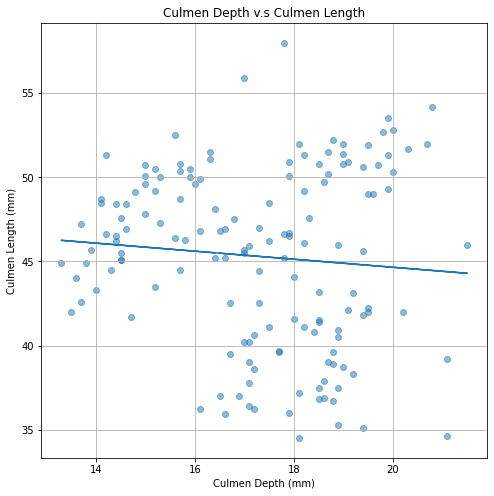

In [ ]:
plt.figure(figsize=(8,8))
#scatter plot
plt.scatter(df_species.culmen_depth_mm, df_species.culmen_length_mm, marker ='o', alpha = 0.5)
#add axis and title
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Culmen Length (mm)')
plt.title('Culmen Depth v.s Culmen Length')
#fit a best-fitting line
m, b = np.polyfit(df_species.culmen_depth_mm, df_species.culmen_length_mm, 1)
plt.plot(df_species.culmen_depth_mm, m*df_species.culmen_depth_mm + b)
#add grid
plt.grid()
plt.show()

Instead of having a weak positive correlation between culmen depth and culmen length, we get a weak **negative** correlation between culmen depth and culmen length after omitting the species. 


Calculate the correlation between culmen depth and culmen length (omitting species): 

In [ ]:
corr = round(df_species.culmen_depth_mm.corr(df_species.culmen_length_mm),3)
print(corr)

-0.089


It's **a Simpson's Paradox**...

###flipper length over islands and over species 

Let's see how many penguins we have on each island!

In [ ]:
print(df.island.unique()) 
print(df.value_counts(subset = df.island))

['Torgersen' 'Biscoe' 'Dream']
island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64


In [ ]:
#simple random sampling
random.seed(234)
df_biscoe = df[df.island == "Biscoe"].sample(n = 50)
df_dream = df[df.island == "Dream"].sample(n = 50)
df_torgersen = df[df.island == "Torgersen"].sample(n = 50)
#concat three islands into a new df
df_island = pd.concat([df_biscoe,df_dream,df_torgersen])

flipper length over island

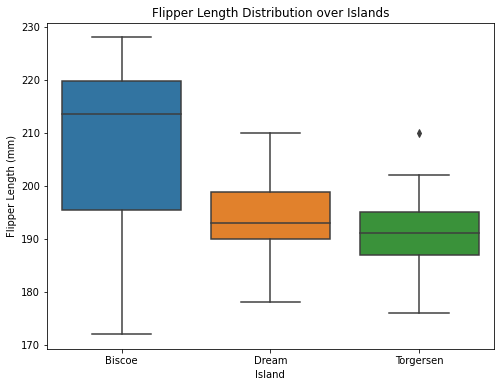

In [ ]:
import seaborn as sb
plt.figure(figsize=(8,6))
#Boxplot
sb.boxplot(x ='island', y='flipper_length_mm', data= df_island)
plt.xlabel('Island')
plt.ylabel('Flipper Length (mm)')
plt.title('Flipper Length Distribution over Islands')
plt.show()

Penguins on **Biscoe** island have large flipper length than those on Dream island and Torgersen island on average.

flipper length over species

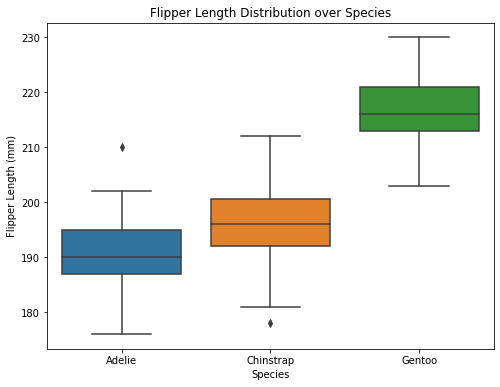

In [ ]:
plt.figure(figsize=(8,6))
#Boxplot
sb.boxplot(x ='species', y='flipper_length_mm', data= df_species)
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.title('Flipper Length Distribution over Species')
plt.show()

**Gentoo** penguins have a much larger flipper length than Adelie penguins and Chinstrap penguins on average.

Does Biscoe's larger average flipper length come from the fact that most penguins who live on Biscoe island are Gentoo?

In [ ]:
print("Biscoe: ", df.value_counts(subset = df_biscoe.species))
print("Dream: ", df.value_counts(subset = df_dream.species))
print("Torgersen: ", df.value_counts(subset = df_torgersen.species))

Biscoe:  species
Gentoo    34
Adelie    16
dtype: int64
Dream:  species
Chinstrap    26
Adelie       24
dtype: int64
Torgersen:  species
Adelie    50
dtype: int64


50 gentoo penguins in df_species all live in Biscoe island. 

###Body mass and flipper length over sex

Let's see how many penguins we have for each sex

In [ ]:
print(df.sex.unique()) 
print(df.value_counts(subset = df.sex))

['MALE' 'FEMALE' nan '.']
sex
MALE      168
FEMALE    165
.           1
dtype: int64


In [ ]:
# simple random sampling
random.seed(234)
df_male = df[df.sex == "MALE"].sample(n = 100)
df_female = df[df.sex == "FEMALE"].sample(n = 100)

Sex v.s Body Mass

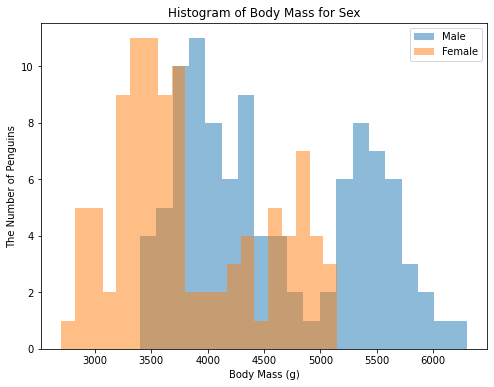

In [ ]:
plt.figure(figsize=(8,6))
#Histogram 
plt.hist(df_male.body_mass_g, label = "Male", bins = 20, alpha = 0.5)
plt.hist(df_female.body_mass_g, label = "Female", bins = 20, alpha = 0.5)
#add axis and title 
plt.xlabel('Body Mass (g)')
plt.ylabel('The Number of Penguins')
plt.title('Histogram of Body Mass for Sex')
#add legend and grid
plt.legend()
plt.show()

Calculate the average body mass for male and female


In [ ]:
male_mean = df_male.body_mass_g.mean()
female_mean = df_female.body_mass_g.mean()
print(male_mean,female_mean)

4587.25 3827.75


Sex v.s. Flipper Length

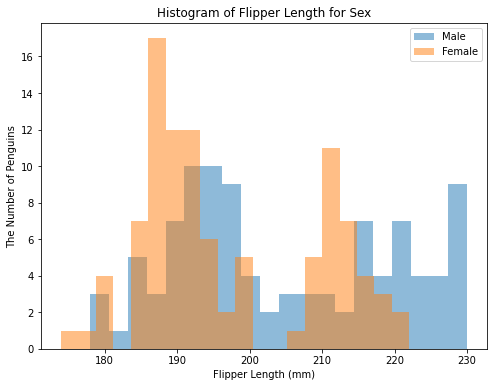

In [ ]:
plt.figure(figsize=(8,6))
#Histogram 
plt.hist(df_male.flipper_length_mm, label = "Male", bins = 20, alpha = 0.5)
plt.hist(df_female.flipper_length_mm, label = "Female", bins = 20, alpha = 0.5)
#add axis and title 
plt.xlabel('Flipper Length (mm)')
plt.ylabel('The Number of Penguins')
plt.title('Histogram of Flipper Length for Sex')
#add legend and grid
plt.legend()
plt.show()

Calculate the average flipper length for male and female

In [ ]:
male_mean_2 = df_male.flipper_length_mm.mean()
female_mean_2 = df_female.flipper_length_mm.mean()
print(male_mean_2,female_mean_2)

204.82 197.04


For both sexes, does flipper length has any correlation with body mass?

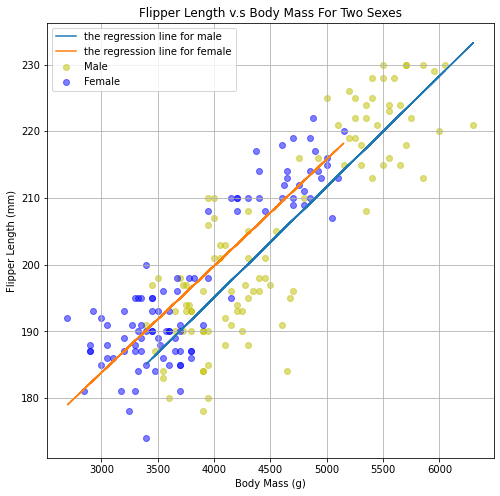

In [ ]:
plt.figure(figsize=(8,8))
#scatter plot
plt.scatter(df_male.body_mass_g, df_male.flipper_length_mm, color = 'y', marker ='o', alpha = 0.5, label = "Male")
plt.scatter(df_female.body_mass_g, df_female.flipper_length_mm, color = 'b', marker ='o', alpha = 0.5, label = "Female")
#add axis and title
plt.xlabel('Body Mass (g)')
plt.ylabel('Flipper Length (mm)')
plt.title('Flipper Length v.s Body Mass For Two Sexes')
#fit a best-fitting line
m, b = np.polyfit(df_male.body_mass_g, df_male.flipper_length_mm, 1)
plt.plot(df_male.body_mass_g, m*df_male.body_mass_g + b, label = "the regression line for male")
m, b = np.polyfit(df_female.body_mass_g, df_female.flipper_length_mm, 1)
plt.plot(df_female.body_mass_g, m*df_female.body_mass_g + b, label = "the regression line for female")
#add legend and grid
plt.grid()
plt.legend()
plt.show()

Calculate the correlation between body mass and flipper length for both sexes:

In [ ]:
male_corr = round(df_male.body_mass_g.corr(df_male.flipper_length_mm),3)
female_corr = round(df_female.body_mass_g.corr(df_female.flipper_length_mm),3)
print(male_corr,female_corr) 

0.863 0.872


There exists a **strong positive** correlation between body mass and flipper length.